# Introduction - Analysis of U.S. Contagious Diseases

Our dataset includes records of different contagious diseases, the states in which they were reported, the number of reported cases, and the population at the time of reporting.

**Source:** [Tycho Project  ](https://www.tycho.pitt.edu/) via dslabs package for R

**Size:** 18,870 rows with 6 columns

## Columns of Interest:

- **Disease:** Name of Contagious Disease
- **State:** U.S. state of report
- **Year:** The year the disease was reported
- **Weeks Reporting:** Number of weeks in the year the disease was reported
- **Count:** The number of reported cases
- **Population:** Population of the state during the year of report

## Questions of Interest:

- How does the population size affect the spread?
- Which state is most affected by diseases?
- How quickly do cases drop after vaccines implementation?
- Which disease spread the fastest?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/yosephhabtu/US-Contagious-Diseases/main/us_contagious_diseases.csv')
print(df.head())

       disease    state  year  weeks_reporting  count  population
0  Hepatitis A  Alabama  1966               50    321   3345787.0
1  Hepatitis A  Alabama  1967               49    291   3364130.0
2  Hepatitis A  Alabama  1968               52    314   3386068.0
3  Hepatitis A  Alabama  1969               49    380   3412450.0
4  Hepatitis A  Alabama  1970               51    413   3444165.0


In [ ]:
df = df.dropna()
df.describe()

,year,weeks_reporting,count,population
count,18666.000000,18666.000000,18666.000000,1.866600e+04
mean,1974.419211,33.599111,1380.562092,4.242911e+06
std,21.661231,19.942055,5534.444941,4.804728e+06
min,1928.000000,0.000000,0.000000,8.685300e+04
25%,1957.000000,16.000000,2.000000,1.046542e+06
50%,1977.000000,44.000000,49.000000,2.824918e+06
75%,1992.000000,50.000000,453.000000,5.153640e+06
max,2011.000000,52.000000,132342.000000,3.760752e+07


In [ ]:
by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})
by_state['mean_pop_in_millions'] = by_state['mean_pop'] / 10**6
by_state

<ipython-input-130-c31078f636fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})


,mean_count,mean_pop,mean_pop_in_millions
state,,,
Alabama,749.875676,3.689245e+06,3.689245
Alaska,76.798507,4.716158e+05,0.471616
Arizona,712.600000,2.651265e+06,2.651265
Arkansas,525.129730,2.202317e+06,2.202317
California,5441.713514,2.199560e+07,21.995604
Colorado,945.497297,2.673458e+06,2.673458
Connecticut,1343.316216,2.839231e+06,2.839231
Delaware,129.381081,5.563034e+05,0.556303
District Of Columbia,226.891892,6.631107e+05,0.663111


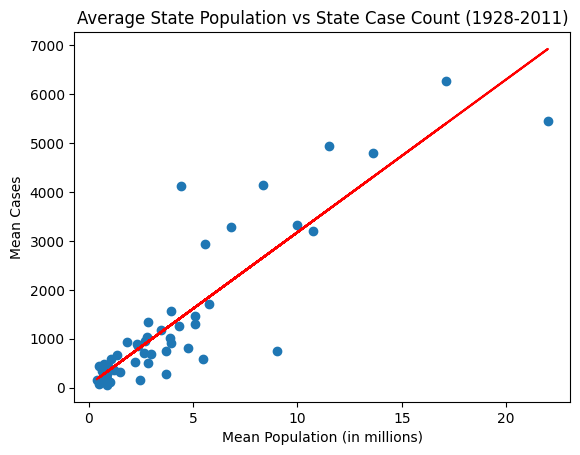

In [ ]:
x = by_state.mean_pop_in_millions
y = by_state.mean_count

plt.scatter(x, y)
plt.xlabel('Mean Population (in millions)')
plt.ylabel('Mean Cases')
plt.title('Average State Population vs State Case Count (1928-2011)')

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red')
plt.show()

In [ ]:
print('Equation of Regression Line: y = ' + str(slope) + 'x + ' + str(intercept))
r = np.corrcoef(x, y)[1,0]
print('Correlation Coefficient (r):', r)
print('Coefficient of Determination (R Squared):', r ** 2)

Equation of Regression Line: y = 312.09201317306616x + 54.35798445928989
Correlation Coefficient (r): 0.8856559731727545
Coefficient of Determination (R Squared): 0.7843865028165787


In [ ]:
top5_total = df.groupby('state').sum()[['count']].rename(columns = {'count':'total_cases'}).sort_values('total_cases', ascending=False).head(5)
top5_total

<ipython-input-108-0690ce363589>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_total = df.groupby('state').sum()[['count']].rename(columns = {'count':'total_cases'}).sort_values('total_cases', ascending=False).head(5)


,total_cases
state,
New York,2319610
California,2013434
Pennsylvania,1825428
Texas,1774482
Michigan,1534864


In [ ]:
top5_measles = df[df.disease == 'Measles'].groupby('state').sum()[['count']].rename(columns = {'count':'total_measles_cases'}).sort_values('total_measles_cases', ascending=False).head(5).reset_index()
top5_mumps = df[df.disease == 'Mumps'].groupby('state').sum()[['count']].rename(columns = {'count':'total_mumps_cases'}).sort_values('total_mumps_cases', ascending=False).head(5).reset_index()
top5_rubella = df[df.disease == 'Rubella'].groupby('state').sum()[['count']].rename(columns = {'count':'total_rubella_cases'}).sort_values('total_rubella_cases', ascending=False).head(5).reset_index()

print(top5_measles)
print(top5_mumps)
print(top5_rubella)

          state  total_measles_cases
0      New York              1792782
1  Pennsylvania              1452099
2    California              1376847
3         Texas              1208766
4     Wisconsin              1166684
        state  total_mumps_cases
0   Wisconsin              84926
1    Michigan              78642
2  California              67020
3       Texas              59591
4        Ohio              43547
        state  total_rubella_cases
0  California                56560
1    Michigan                31179
2   Wisconsin                27428
3       Texas                26428
4    New York                23689


<ipython-input-109-9a2d1188f60d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_measles = df[df.disease == 'Measles'].groupby('state').sum()[['count']].rename(columns = {'count':'total_measles_cases'}).sort_values('total_measles_cases', ascending=False).head(5).reset_index()
<ipython-input-109-9a2d1188f60d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_mumps = df[df.disease == 'Mumps'].groupby('state').sum()[['count']].rename(columns = {'count':'total_mumps_cases'}).sort_values('total_mumps_cases', ascending=False).head(5).reset_index()
<ipython-input-109-9a2d1188f60d>:3: FutureWarning: The def

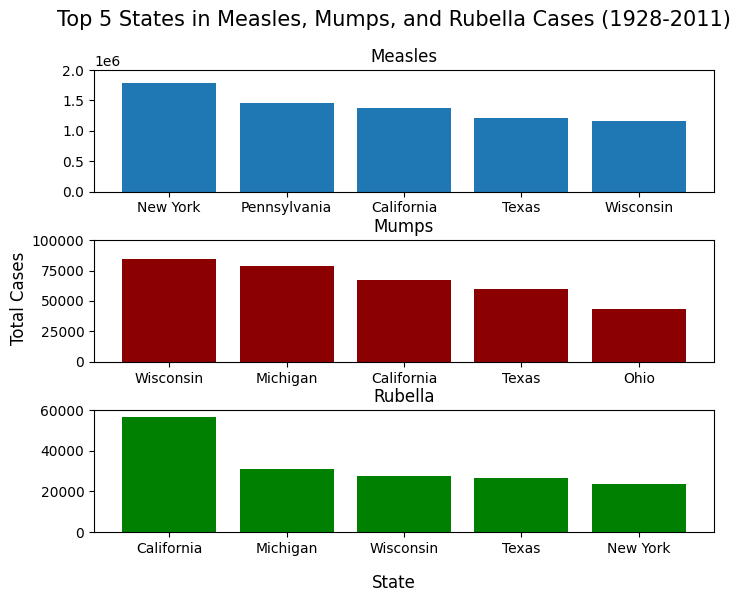

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].bar(top5_measles.state, top5_measles.total_measles_cases)
ax[1].bar(top5_mumps.state, top5_mumps.total_mumps_cases, color='darkred')
ax[2].bar(top5_rubella.state, top5_rubella.total_rubella_cases, color='green')

plt.subplots_adjust(hspace=0.4)

ax[0].set_title('Measles')
ax[1].set_title('Mumps')
ax[2].set_title('Rubella')

ax[0].set_ylim(0, 2000000)
ax[1].set_ylim(0, 100000)
ax[2].set_ylim(0, 60000)

fig.supylabel('Total Cases')
fig.supxlabel('State')
fig.suptitle('Top 5 States in Measles, Mumps, and Rubella Cases (1928-2011)', fontsize = 15)
plt.show()

In [ ]:
# Look at changes in measles, mumps, and rubella cases after implementation of the MMR vaccine in 1971
# filter for MMR:

mmr = df.query("disease == 'Measles'" or "disease == 'Mumps'" or "disease == 'Rubella'")
print(mmr.head(5))

      disease    state  year  weeks_reporting  count  population
2346  Measles  Alabama  1928               52   8843   2589923.0
2347  Measles  Alabama  1929               49   2959   2619131.0
2348  Measles  Alabama  1930               52   4156   2646248.0
2349  Measles  Alabama  1931               49   8934   2670818.0
2350  Measles  Alabama  1932               41    270   2693027.0


In [ ]:
mmr_means = mmr.groupby(['disease', 'year']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})
print(mmr_means.head(5)) #group by disease, and year; calculate mean count and population

               mean_count      mean_pop
disease year                           
Measles 1928  9864.020408  2.444276e+06
        1929  6919.612245  2.476576e+06
        1930  7848.918367  2.505613e+06
        1931  8947.653061  2.530758e+06
        1932  7961.510204  2.552372e+06


<ipython-input-112-0c51dcc83e88>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mmr_means = mmr.groupby(['disease', 'year']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})


In [ ]:
mmr_means['ppc'] = mmr_means['mean_count']/ mmr_means['mean_pop'] * 100 # create calculated "percentage per capita" column
print(mmr_means.head(5))

               mean_count      mean_pop       ppc
disease year                                     
Measles 1928  9864.020408  2.444276e+06  0.403556
        1929  6919.612245  2.476576e+06  0.279402
        1930  7848.918367  2.505613e+06  0.313253
        1931  8947.653061  2.530758e+06  0.353556
        1932  7961.510204  2.552372e+06  0.311926


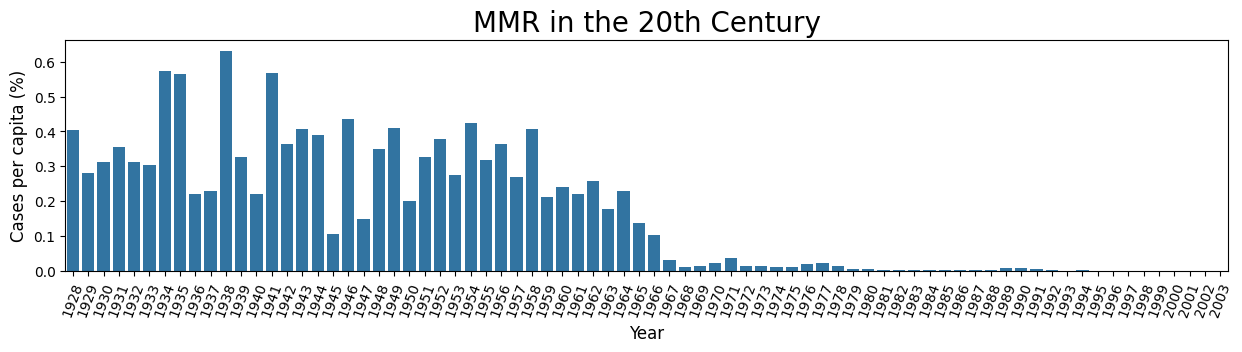

Measles, mumps, and rubella cases per capita decreased after 1964. The measles vaccine was introduced in 1963.
After the MMR vaccine was introduced in 1971 cases per capita stayed near 0 with occasional minor spikes.


In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 3 ))
sns.barplot(x = 'year', y = 'ppc', data = mmr_means)
ax.set_xlabel( 'Year' , size = 12 )
ax.set_ylabel('Cases per capita (%)' , size = 12 )
ax.set_title("MMR in the 20th Century" , size = 20 )
plt.xticks(rotation=70)
plt.show()
print("Measles, mumps, and rubella cases per capita decreased after 1964. The measles vaccine was introduced in 1963.")
print("After the MMR vaccine was introduced in 1971 cases per capita stayed near 0 with occasional minor spikes.")

In [ ]:
mmr = mmr.reset_index()
year_1928 = mmr[mmr.year == 1928]
year_1928
year_2003 = mmr[mmr.year == 2003]
year_2003

,index,disease,state,year,weeks_reporting,count,population
75,2421,Measles,Alabama,2003,0,0,4564878.0
119,2497,Measles,Alaska,2003,0,0,648078.0
195,2573,Measles,Arizona,2003,0,0,5554021.0
271,2649,Measles,Arkansas,2003,0,0,2765142.0
347,2725,Measles,California,2003,0,0,34861711.0
423,2801,Measles,Colorado,2003,0,0,4576377.0
499,2877,Measles,Connecticut,2003,0,0,3447563.0
575,2953,Measles,Delaware,2003,0,0,819034.0
651,3029,Measles,District Of Columbia,2003,0,0,573947.0
727,3105,Measles,Florida,2003,0,0,16841116.0


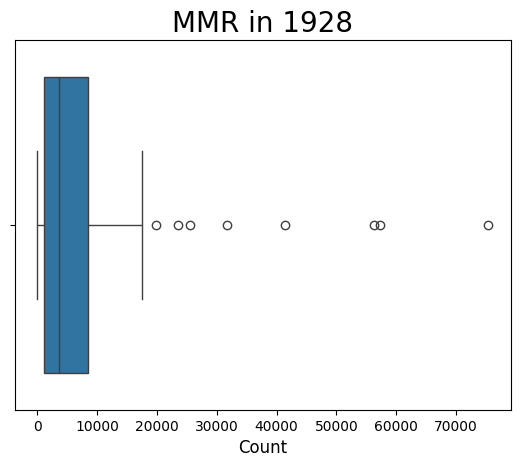

In [ ]:
plt.figure()
sns.boxplot(x = year_1928["count"])
plt.xlabel("Count", size = 12)
plt.title("MMR in 1928" , size = 20)
plt.show()

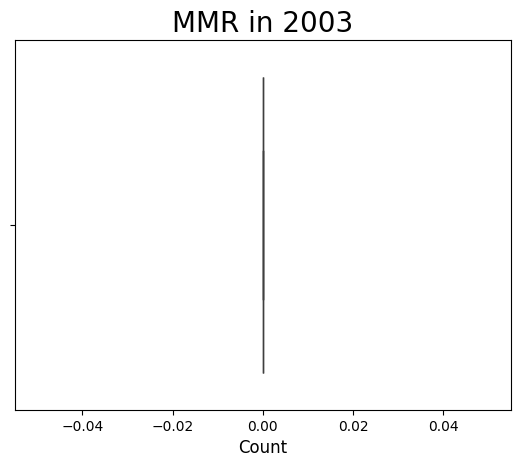

These boxplots show that cases of measles, mumps, and rubella were close to zero in 2003, in contrast with 1928 (The first year in this dataset) where cases were in the tens of thousands.


In [ ]:
plt.figure()
sns.boxplot(x = year_2003["count"])
plt.xlabel("Count", size = 12)
plt.title("MMR in 2003" , size = 20)
plt.show()
print("These boxplots show that cases of measles, mumps, and rubella were close to zero in 2003, in contrast with 1928 (The first year in this dataset) where cases were in the tens of thousands.")

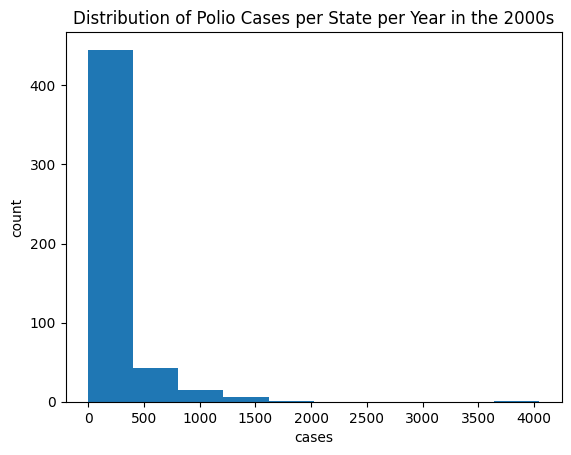

clearly the counts are skewed, thus the median is a better measure of the center 

the bootstrapped median cases per state in the 2000s is 83.8645 

assuming all people with polio survived (which is unlikely),
a median between 16.772900000000003 and 33.54580000000001 people
per state infected with polio in the 2000s live with PPS now


In [4]:
# simulate a non-parametric inference of the median of a quantitative variable
polio = df.query("disease == 'Polio'")

# the symptoms of post-polio syndrome can take up to 15 years to present, thus
# limit the end year to 2009
polio_2000s = polio.query("year >= 2000 & year <=2009")

# visualize the distribution of polio infection counts by states in the 2000s
plt.figure()
plt.hist(polio_2000s["count"])
plt.xlabel("cases")
plt.ylabel("count")
plt.title("Distribution of Polio Cases per State per Year in the 2000s")
plt.show()

print("clearly the counts are skewed, thus the median is a better measure of the center \n")

# the number of states is 50, and there are 10 years, thus 500 units in the data
medians_boot_samples = []
for i in range(1000):
  boot_sample = np.random.choice(polio_2000s["count"], 50)
  medians_boot_samples.append(np.median(boot_sample))

median_cases = np.mean(medians_boot_samples)
print(f"the bootstrapped median cases per state in the 2000s is {median_cases} \n")

# post-polio syndrome affects between 20% to 40% of polio survivors
print("assuming all people with polio survived (which is unlikely),")
print(f"a median between {0.2*median_cases} and {0.4*median_cases} people")
print("per state infected with polio in the 2000s live with PPS now")

In [7]:
conf_int = np.percentile(medians_boot_samples, [2.5, 97.5])
print("the 95% confidence interval for the median by the samples is:")
print(conf_int)

the 95% confidence interval for the median by the samples is:
[ 51.475 123.   ]


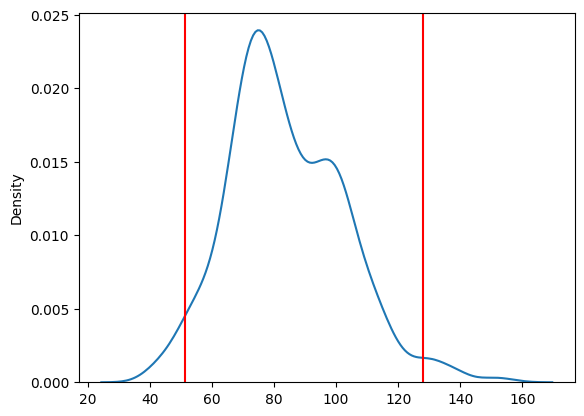

In [ ]:
import seaborn as sns
sns.kdeplot(medians_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [ ]:
# repeat the same process using seaborn

from sklearn.utils import resample
medians_boot_samples = []
for i in range(1000):
                boot_sample = resample(polio_2000s["count"]) # does bootstrap; replace = True
                medians_boot_samples.append(np.median(boot_sample))

print(np.mean(medians_boot_samples))
print("the results are very similar")

82.451
the results are very similar


In [8]:
# COPY From Assefa Dinsa Dassa
# Team2:Adi, Assefa, Nandini, Xutong and Yoseph

# Professor Abdirisak Mohamed

# Data201 - Project One

# 26 March 2024

# 1. Introduction
#  The Project is one of the requirements of DATA203. We are handling the Project in groups. The members are, alphbetically, Adi, Assefa, Nandini, Xutong and Yoseph.
# 2. Project Title: US CONTAGIOUS DISEASES
# 3. Purpose of the Project:
#  3.1 Indentify appropriate dataset
#  3.2 Import the dataset
#  3.3 Carry out Exploratory Data Analysis
#  3.4 Find out any unique condition
#  3.5 Conduct deep analysis
#  3.6 Finding and recommendations
# 4. Data Source:
# https://raw.githubusercontent.com/yosephhabtu/US-Contagious-Diseases/main/us_contagious_diseases.csv

[71]
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/yosephhabtu/US-Contagious-Diseases/main/us_contagious_diseases.csv')

[72]
# Summary of the First Five Lines of the Data
df.head(5)


[73]
#Summary of the Last Five Lines ofthe Data
df.tail()

[74]
# Information on Count of the Data
df.count()
# disease            18870
# state              18870
# year               18870
# weeks_reporting    18870
# count              18870
# population         18666
# dtype: int64
[75]
# Column Details
df.columns
# Index(['disease', 'state', 'year', 'weeks_reporting', 'count', 'population'], dtype='object')
[76]


[76]